In [48]:
import pandas as pd
import numpy as np
# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from utils.exploration import *

In [49]:
df_raw = pd.read_csv('Data/cleaned_data2.csv')

In [50]:
df = df_raw.copy()

In [51]:
display(df.head(3), df.shape)

,Radiation recode,Survival months,Age,Marital Status,Sex_is_male,Race,Chemotherapy,Surgery,T,N,M,Grouped Stage,Tumor Size
0,1,5,35-54 years,Married,1,White,1,0,T0,N3,M1,4,0
1,1,25,75-79 years,Single,1,White,1,0,T1,N0,M0,1,20
2,0,1,55-59 years,Single (never married),1,White,0,1,T1,N3,M1,4,11


(138, 13)

Mean of Survival months: 6.85
Median of Survival months: 5.00
Standard deviation of Survival months: 6.87
Mode of Survival months: 0
Number of outliers in Survival months: 3
Number of extreme outliers in Survival months: 0


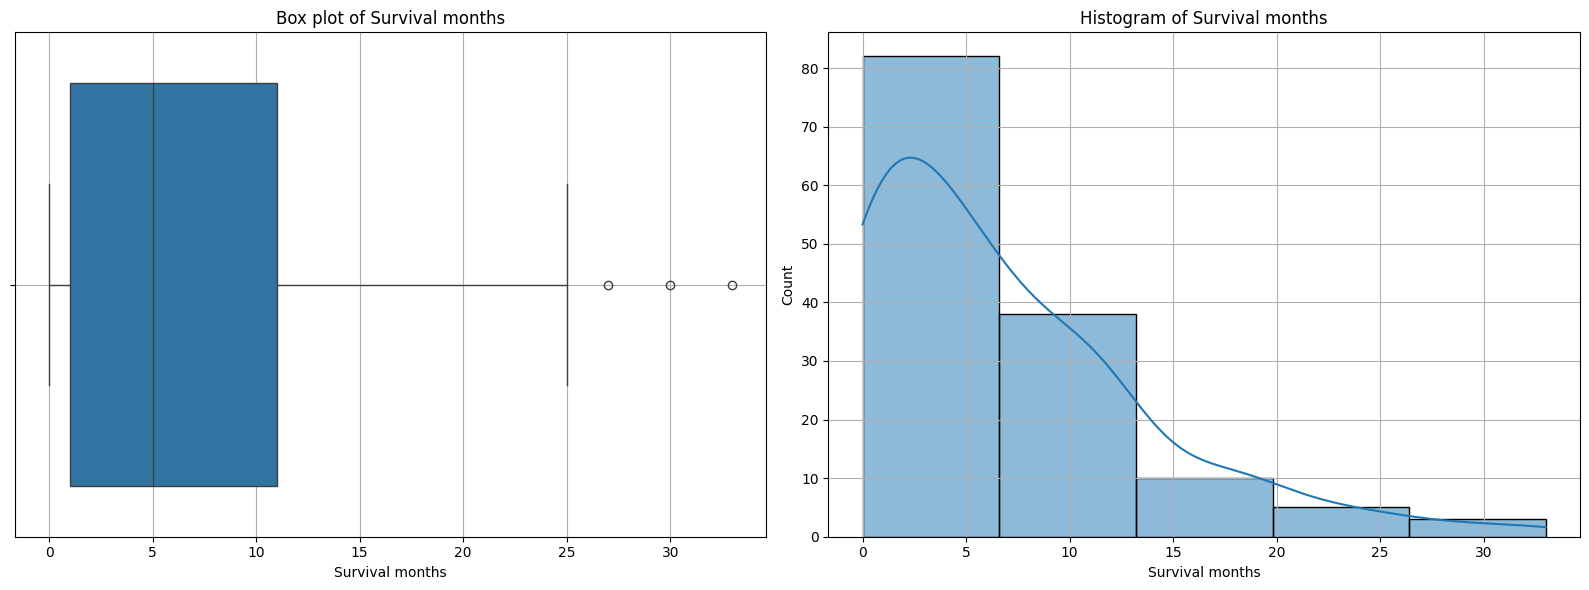

In [52]:
# check Survival Months distribution
data_exploration(df, 'Survival months')

Mean of Tumor Size: 52.30
Median of Tumor Size: 43.50
Standard deviation of Tumor Size: 33.96
Mode of Tumor Size: 25
Number of outliers in Tumor Size: 9
Number of extreme outliers in Tumor Size: 0


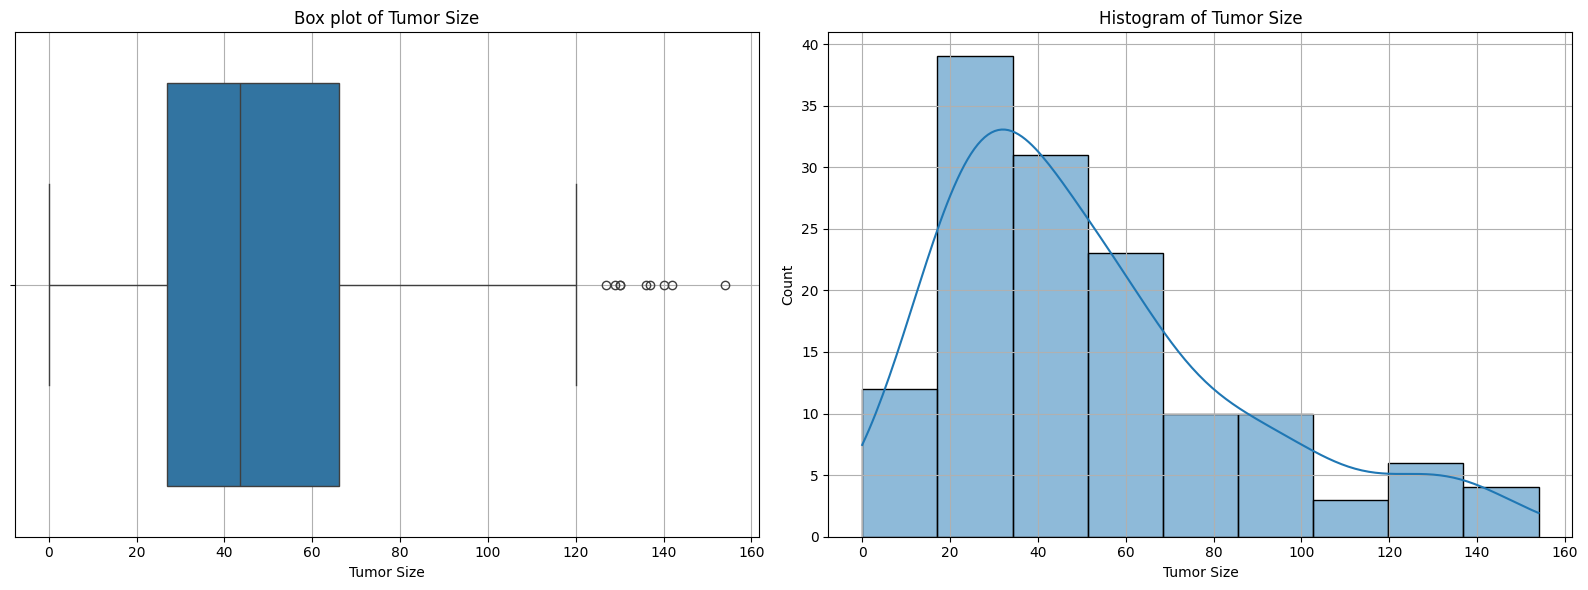

In [53]:
# check Tumor Size distribution
data_exploration(df, 'Tumor Size')

Counts and percentages of unique values in Survival Group:
                Count  Percentage
Survival Group                   
1                  74   53.623188
0                  64   46.376812


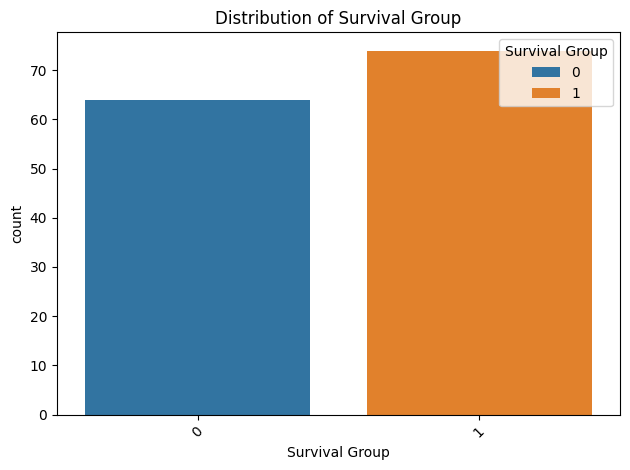

In [54]:
# make them two groups
df['Survival Group'] = df['Survival months'].apply(lambda x: 1 if x <= 5 else 0) # we focus on the more severe group

data_exploration(df, 'Survival Group')

In [55]:
# drop old columns
df = df.drop(['Survival months'], axis=1)

In [56]:
# change the column Grouped Stage to categorical
df['Grouped Stage'] = df['Grouped Stage'].astype('category')

In [57]:
# a loop to convert all object columns to category
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Radiation recode  138 non-null    int64   
 1   Age               138 non-null    category
 2   Marital Status    138 non-null    category
 3   Sex_is_male       138 non-null    int64   
 4   Race              138 non-null    category
 5   Chemotherapy      138 non-null    int64   
 6   Surgery           138 non-null    int64   
 7   T                 138 non-null    category
 8   N                 138 non-null    category
 9   M                 138 non-null    category
 10  Grouped Stage     138 non-null    category
 11  Tumor Size        138 non-null    int64   
 12  Survival Group    138 non-null    int64   
dtypes: category(7), int64(6)
memory usage: 9.0 KB


In [59]:
# one hot encoding for all category columns
df = pd.get_dummies(df, drop_first=True, dtype='int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Radiation recode                       138 non-null    int64
 1   Sex_is_male                            138 non-null    int64
 2   Chemotherapy                           138 non-null    int64
 3   Surgery                                138 non-null    int64
 4   Tumor Size                             138 non-null    int64
 5   Survival Group                         138 non-null    int64
 6   Age_55-59 years                        138 non-null    int64
 7   Age_60-64 years                        138 non-null    int64
 8   Age_65-69 years                        138 non-null    int64
 9   Age_70-74 years                        138 non-null    int64
 10  Age_75-79 years                        138 non-null    int64
 11  Age_80-84 years                 

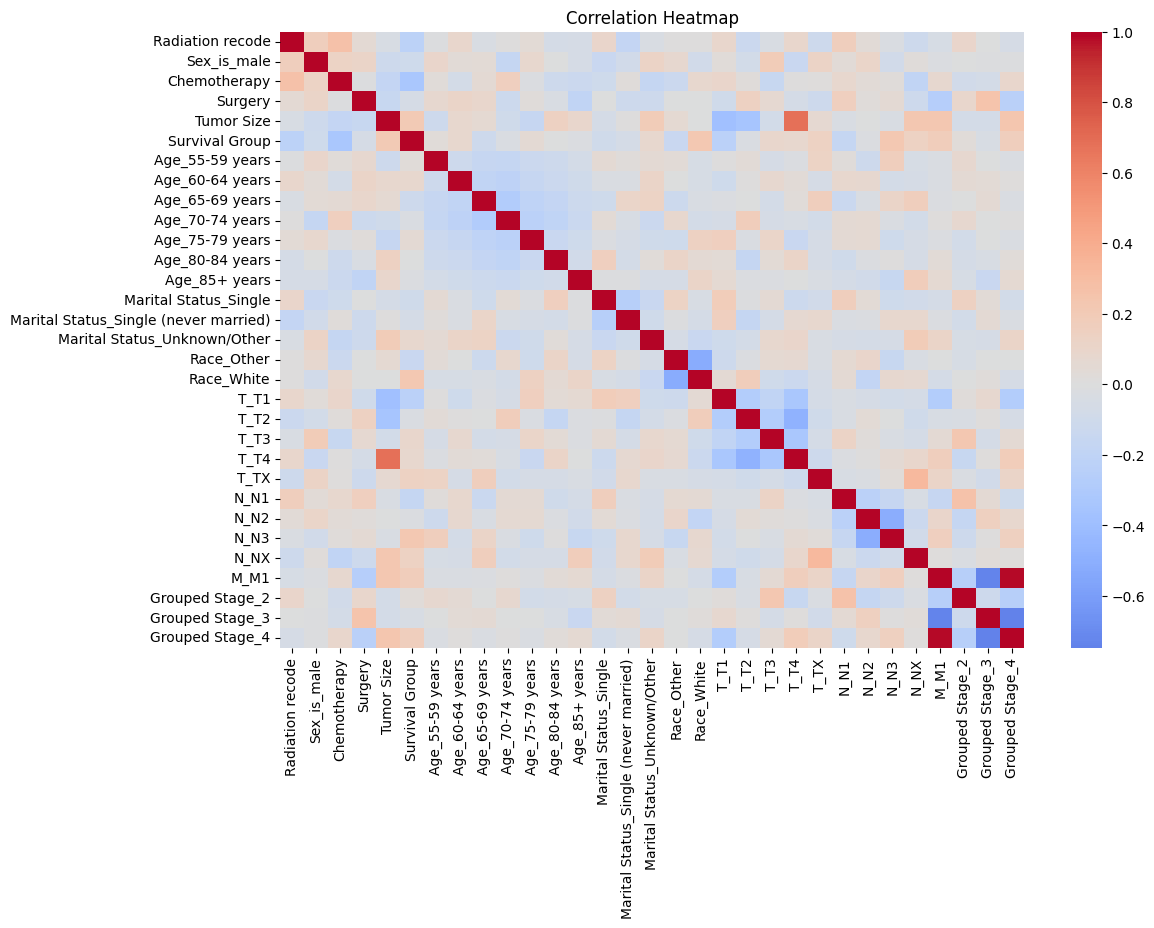

In [60]:
# check the heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
# drop the Grouped Stage_4
df = df.drop(['Grouped Stage_4'], axis=1)

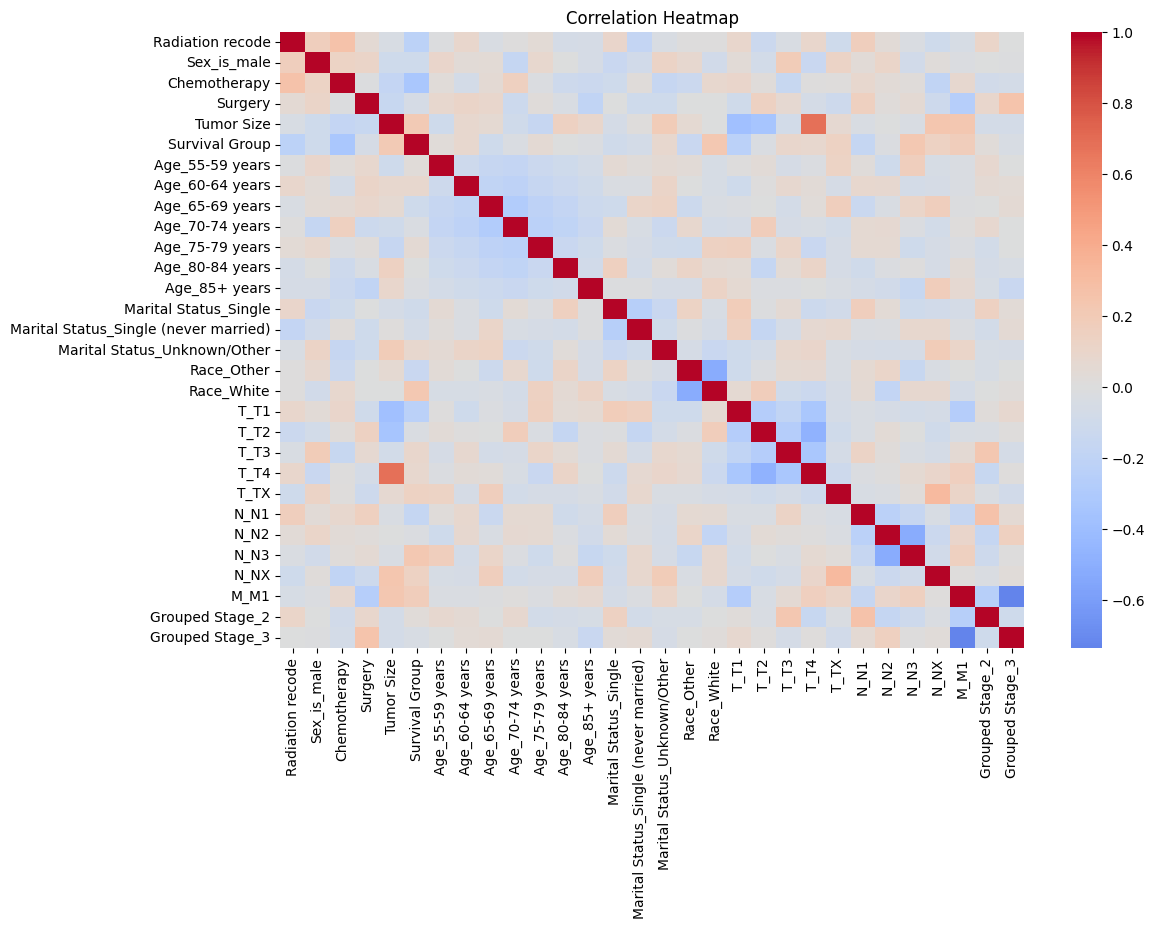

In [62]:
# check the heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Data Splitting

In [63]:
X = df.drop('Survival Group', axis=1)
y = df['Survival Group']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=66, stratify=y)


In [64]:
# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 29), (42, 29), (96,), (42,))

In [65]:
X_train.head(3)

,Radiation recode,Sex_is_male,Chemotherapy,Surgery,Tumor Size,Age_55-59 years,Age_60-64 years,Age_65-69 years,Age_70-74 years,Age_75-79 years,Age_80-84 years,Age_85+ years,Marital Status_Single,Marital Status_Single (never married),Marital Status_Unknown/Other,Race_Other,Race_White,T_T1,T_T2,T_T3,T_T4,T_TX,N_N1,N_N2,N_N3,N_NX,M_M1,Grouped Stage_2,Grouped Stage_3
6,0,0,1,0,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
93,0,0,0,0,75,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
25,1,1,1,0,18,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0


In [66]:
# save the train and test data
X_train.to_csv('Data2/X_train.csv', index=False)
X_test.to_csv('Data2/X_test.csv', index=False)
y_train.to_csv('Data2/y_train.csv', index=False)
y_test.to_csv('Data2/y_test.csv', index=False)